In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
from numba import prange
from numba import njit
from matplotlib import animation

# Part 1
Below we are initialising our 2D grid. We simulate the discrete diffusion process on this grid. 

In [3]:
N = 100

un = np.zeros((N+2,N+2), dtype=np.float64)
#un[1,1]=1


In [27]:
def diffusion_iteration(un):
    un1 = np.full_like(un, un[0,0])
    for index, un_ij in np.ndenumerate(un[1:-1, 1:-1]):
        i,j =index[0],index[1]
        un1[i+1,j+1] = (un[i,j+1]+un[i+2,j+1]+un[i+1,j]+un[i+1,j+2])/4
    return un1


In [28]:
print(diffusion_iteration(un))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [29]:
q0=%timeit -o diffusion_iteration(un)

995 µs ± 69.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [30]:
qavg=q.average
qdev=q.stdev

In [31]:
print(qdev)

3.316744682460398e-07


In [15]:
Ns = [10,20,30,40,50,60,70,80,90,100]
t_avgs = []
t_stdevs = []
for N_i in Ns:
    un_i = np.zeros((N_i+2,N_i+2), dtype=np.float64)
    t = %timeit -o diffusion_iteration(un_i)
    t_avgs.append(t.average)
    t_stdevs.append(t.stdev)
    

535 µs ± 26.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.36 ms ± 260 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.81 ms ± 651 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.17 ms ± 386 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
14.3 ms ± 798 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
22.3 ms ± 1.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
27.1 ms ± 1.75 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
34.1 ms ± 2.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
45.8 ms ± 2.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
56.8 ms ± 5.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
print(t_avgs)
print(t_stdevs)

[0.0005352058714285753, 0.00235598571428568, 0.005810493857142823, 0.009166566857142828, 0.014283321857142903, 0.022297452857141513, 0.02712829571428545, 0.03407653857143, 0.0457853028571435, 0.05683092571428574]
[2.6521528159097172e-05, 0.00026034543689903587, 0.0006508784629221156, 0.00038554657027530686, 0.0007977377537786591, 0.0011784552462033471, 0.001745207494662348, 0.0021954309094733724, 0.002738059286919738, 0.005234068937827844]


Text(0.5, 0, 'N')

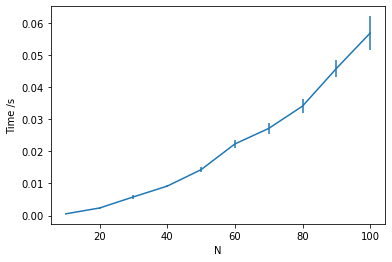

In [18]:
plt.errorbar(Ns, t_avgs, t_stdevs)
plt.ylabel('Time /s')
plt.xlabel('N')

In [41]:
@njit
def jit_diffusion_iteration(un):
    un1 = np.full_like(un, un[0,0])
    for index, un_ij in np.ndenumerate(un[1:-1, 1:-1]):
        i,j =index[0],index[1]
        un1[i+1,j+1] = (un[i,j+1]+un[i+2,j+1]+un[i+1,j]+un[i+1,j+2])/4
    return un1

In [42]:
q1=%timeit -o jit_diffusion_iteration(un)

The slowest run took 4.26 times longer than the fastest. This could mean that an intermediate result is being cached.
12.1 µs ± 9.01 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


The slowest run took 10.29 times longer than the fastest. This could mean that an intermediate result is being cached.
4.2 µs ± 5.44 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
8.47 µs ± 1.61 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
15.8 µs ± 946 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
26 µs ± 502 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
37.9 µs ± 451 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
53.8 µs ± 1.39 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
78.6 µs ± 7.21 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
96.1 µs ± 2.98 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
118 µs ± 1.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
143 µs ± 1.76 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Text(0.5, 0, 'N')

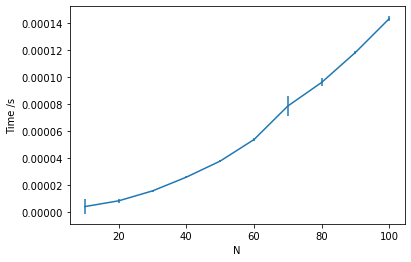

In [10]:
Ns = [10,20,30,40,50,60,70,80,90,100]
t_avgs = []
t_stdevs = []
for N_i in Ns:
    un_i = np.zeros((N_i+2,N_i+2), dtype=np.float64)
    t = %timeit -o jit_diffusion_iteration(un_i)
    t_avgs.append(t.average)
    t_stdevs.append(t.stdev)

plt.errorbar(Ns, t_avgs, t_stdevs)
plt.ylabel('Time /s')
plt.xlabel('N')

In [44]:
un = np.zeros((N+2,N+2), dtype=np.float64)
#un[2,3]=1
@njit
def prange_diffusion_iteration(un):
    un1 = np.full_like(un, un[0,0])
    for i in prange(N):
        for j in prange(N):
            un1[i+1,j+1] = (un[i,j+1]+un[i+2,j+1]+un[i+1,j]+un[i+1,j+2])/4
    return un1
            

In [22]:
prange_diffusion_iteration(un)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [23]:
q2=%timeit -o prange_diffusion_iteration(un)

3.89 µs ± 332 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


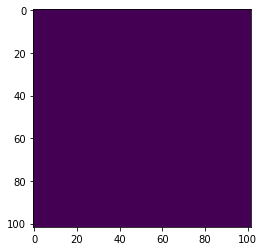

In [4]:
fig = plt.figure()
ax = plt.axes()
image= ax.imshow(un)

In [5]:
def init():
    image.set_data(np.empty((1,1)))
    return image,

In [6]:

def animate(i):
    global un
    un1 = np.full_like(un, un[0,0])
    for i in prange(N):
        for j in prange(N):
            un1[i+1,j+1] = (un[i,j+1]+un[i+2,j+1]+un[i+1,j]+un[i+1,j+2])/4
    image.set_data(un1)
    image.autoscale()
     
    un = un1.copy()
    return image,

In [7]:
qua = [1,2,3]

def f():
    global qua
    qua = [1,1,1]

print(qua)

[1, 2, 3]


In [8]:
f()
print(qua)

[1, 1, 1]


In [13]:
un = np.zeros((N+2,N+2), dtype=np.float64)
un[30:-30,30:-30]=1
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
plt.show()